<a href="https://colab.research.google.com/github/ganeshkumar1887/My-Data-Analysis-/blob/main/data%20analysis%20project/Customer%20Sales%20Analysis%20Project/Customer_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data analysis/Datasets/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [5]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [6]:
df.drop_duplicates(inplace=True)

In [8]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], format="%d/%m/%Y")

In [9]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


**Create Sales Column**

In [10]:
df["Sales"] = df["quantity"] * df["price"]


In [11]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Sales
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


**Basic Data Understanding (EDA)**

In [12]:
df["Sales"].sum()


np.float64(251505794.25000003)

In [13]:
df["customer_id"].nunique()


99457

In [14]:
df["invoice_no"].nunique()


99457

**Perform Main Analysis**

In [15]:
category_sales = df.groupby("category")["Sales"].sum()
category_sales.sort_values(ascending=False)


,Sales
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07
Cosmetics,6.792863e+06
Toys,3.980426e+06
Food & Beverage,8.495351e+05
Books,8.345529e+05
Souvenir,6.358247e+05


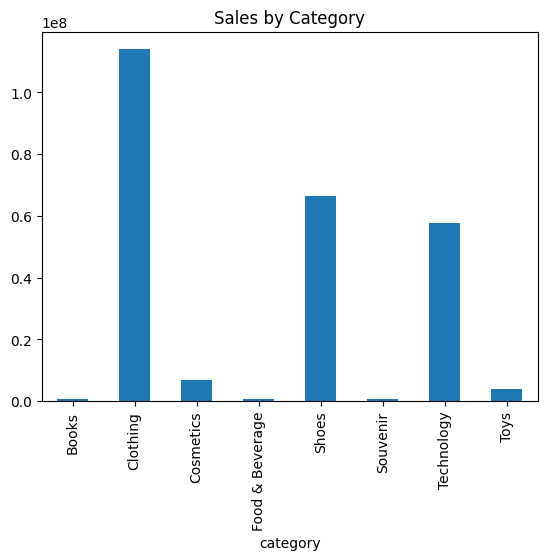

In [16]:
category_sales.plot(kind="bar")
plt.title("Sales by Category")
plt.show()


**Sales by Shopping Mall**

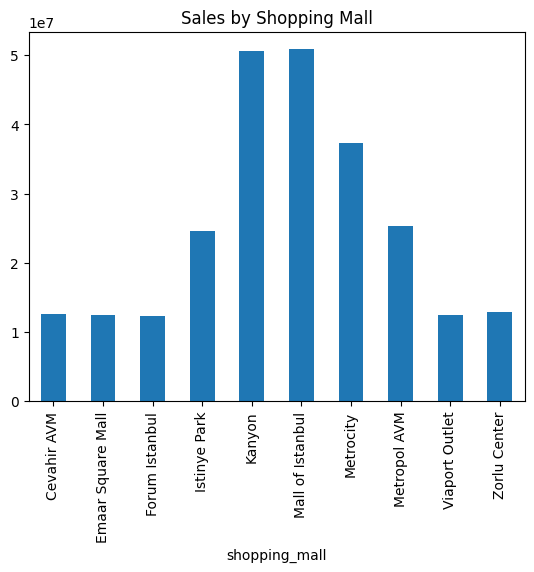

In [17]:
mall_sales = df.groupby("shopping_mall")["Sales"].sum()

mall_sales.plot(kind="bar")
plt.title("Sales by Shopping Mall")
plt.show()


**Gender-wise Spending**

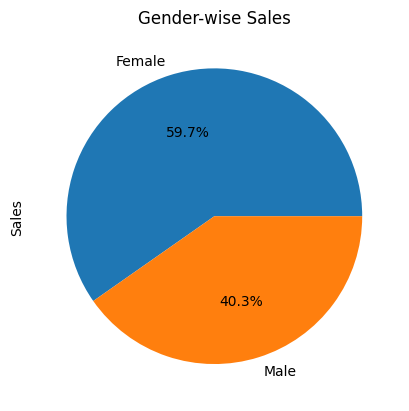

In [18]:
df.groupby("gender")["Sales"].sum().plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender-wise Sales")
plt.show()


Payment Method Analysis

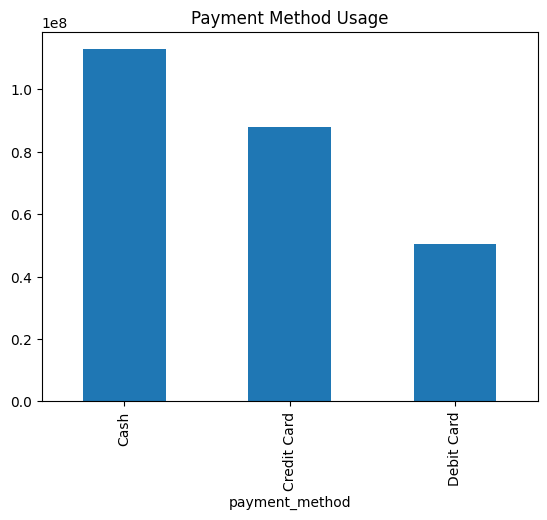

In [19]:
df.groupby("payment_method")["Sales"].sum().plot(kind="bar")
plt.title("Payment Method Usage")
plt.show()


**Monthly Sales Trend ⭐**

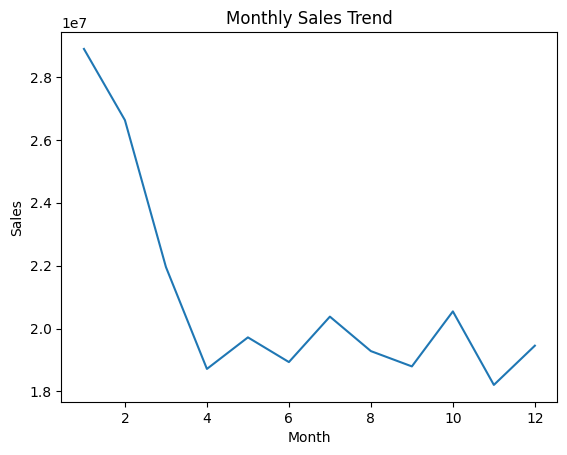

In [20]:
monthly_sales = df.groupby(df["invoice_date"].dt.month)["Sales"].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


**Age Group Analysis**

In [21]:
bins = [18,25,35,45,55,65,100]
labels = ["18-25","26-35","36-45","46-55","56-65","65+"]

df["Age_Group"] = pd.cut(df["age"], bins=bins, labels=labels)


/tmp/ipython-input-4082104672.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_Group")["Sales"].sum().plot(kind="bar")


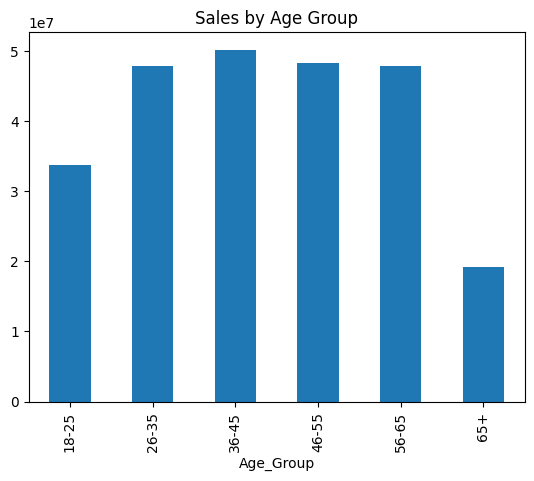

In [22]:
df.groupby("Age_Group")["Sales"].sum().plot(kind="bar")
plt.title("Sales by Age Group")
plt.show()
